In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy.integrate import solve_ivp

In [2]:
# Define the mathematical parameters for the problem
f = lambda t, y: -3*y*np.sin(t) # ODE
y0 = np.pi/(2**.5) # Initial Condition
d_t = 2**(-8) # Step Size 
t = np.arange(0,5+d_t,d_t) # time step

In [3]:
# Forward Euler function
y = np.zeros(len(t))
y[0] = y0
    
for i in range(0, len(t)-1):
    y[i + 1] = y[i] + d_t*f(t[i], y[i])

A1 = y[:, np.newaxis]

### Problem 1a - Forward Euler Method

In [4]:
# Array for dt 
x = np.array([])

for k in range(2,9):
    x = np.append(x,2**(-k))

In [5]:
# Y true function
def y_true(t):
    return (np.pi * np.exp(3*(np.cos(t)-1))/(2**.5)) 

In [6]:
A2 = np.array([])

for dt in x:
    f = lambda t, y: -3*y*np.sin(t) # ODE
    y0 = np.pi/(2**.5) # Initial Condition
    t = np.arange(0,5+dt,dt) # time step
    
    # Y function
    y = np.zeros(len(t))
    y[0] = y0
    
    for i in range(0, len(t)-1):
        y[i + 1] = y[i] + dt*f(t[i], y[i])
    
    # Error function
    A2 = np.append(A2,abs(y_true(5) - y[len(t)-1]))

In [7]:
x

array([0.25      , 0.125     , 0.0625    , 0.03125   , 0.015625  ,
       0.0078125 , 0.00390625])

In [8]:
# plt.plot(np.log(A2),np.log(x))

In [9]:
A3 = np.polyfit(np.log(x), np.log(A2), 1)
A3 = A3[0]

In [10]:
A2 = A2.reshape(1,7)

### Problem 1b - Heun's Method

In [11]:
# Define the mathematical parameters for the problem
f = lambda t, y: -3*y*np.sin(t) # ODE
y0 = np.pi/(2**.5) # Initial Condition
d_t = 2**(-8) # Step Size 
t = np.arange(0,5+d_t,d_t) # time step

In [12]:
# Heun's function
y = np.zeros(len(t))
y[0] = y0
    
for i in range(0, len(t)-1):
    y[i + 1] = y[i] + (d_t/2)*(f(t[i],y[i]) + f(t[i+1], y[i]+ d_t*f(t[i],y[i])))

A4 = y[:, np.newaxis]

In [13]:
# Array for dt 
x = np.array([])

for k in range(2,9):
    x = np.append(x,2**(-k))

In [14]:
# Y true function
def y_true(t):
    return (np.pi * np.exp(3*(np.cos(t)-1))/(2**.5)) 

In [15]:
A5 = np.array([])

for dt in x:
    f = lambda t, y: -3*y*np.sin(t) # ODE
    y0 = np.pi/(2**.5) # Initial Condition
    t = np.arange(0,5+dt,dt) # time step
    
    # Y function
    y = np.zeros(len(t))
    y[0] = y0
    
    for i in range(0, len(t)-1):
        y[i + 1] = y[i] + (dt/2)*(f(t[i],y[i]) + f(t[i+1], y[i]+ dt*f(t[i],y[i])))
    
    # Error function
#     print(abs(y_true(5) - y[len(t)-1]))
    A5 = np.append(A5,abs(y_true(5) - y[len(t)-1]))

In [16]:
A6 = np.polyfit(np.log(x), np.log(A5), 1)
A6 = A6[0]

In [17]:
A5 = A5.reshape(1,7)

### Problem 1c - Adam's Predictor  Method

In [18]:
# Define the mathematical parameters for the problem
f = lambda t, y: -3*y*np.sin(t) # ODE
y0 = np.pi/(2**.5) # Initial Condition
d_t = 2**(-8) # Step Size 
t = np.arange(0,5+d_t,d_t) # time step

In [19]:
# Adam's Predictor Method

y = np.zeros(len(t))
y[0] = y0
y[1] = y0 + d_t*f(t[0]+(d_t/2),y[0]+((d_t/2)*f(t[0],y[0])))
    
for i in range(0,len(t)-1):
    y_p = y[i+1] + (d_t/2)*(3*f(t[i+1],y[i+1])-f(t[i],y[i]))
#     print(y_p)
    if i == len(t)-2 : 
        break
    else:
        y[i + 2] = y[i+1] + (d_t/2)*(f(t[i+2],y_p)+f(t[i+1],y[i+1]))

A7 = y[:, np.newaxis]

In [20]:
# Array for dt 
x = np.array([])

for k in range(2,9):
    x = np.append(x,2**(-k))

In [21]:
# Y true function
def y_true(t):
    return (np.pi * np.exp(3*(np.cos(t)-1))/(2**.5)) 

In [22]:
A8 = np.array([])

for dt in x:
    t = np.arange(0,5+dt,dt) # time step
    y1 = np.zeros(len(t)) # define y array
    
    f = lambda t, y1: -3*y1*np.sin(t) # ODE function
    y0 = np.pi/(2**.5) # Initial Condition definition
    y1[0] = y0 # Initial Condition 
    y1[1] = y0 + dt*f(t[0]+(dt/2),y1[0]+((dt/2)*f(t[0],y1[0]))) # Second Initial Condition
    
    for i in range(0,len(t)-1): 
        y_p = y1[i+1] + (dt/2)*(3*f(t[i+1],y1[i+1])-f(t[i],y1[i]))
        
        if i == len(t)-2 : 
            break
        else:
            y1[i + 2] = y1[i+1] + (dt/2)*(f(t[i+2],y_p)+f(t[i+1],y1[i+1]))
    
    # Error function
    A8 = np.append(A8,abs(y_true(5) - y1[len(t)-1]))

In [23]:
A9 = np.polyfit(np.log(x), np.log(A8), 1)
A9 = A9[0]

In [24]:
A8 = A8.reshape(1,7)

### Presentation for Problem 1 

In [25]:
x

array([0.25      , 0.125     , 0.0625    , 0.03125   , 0.015625  ,
       0.0078125 , 0.00390625])

In [26]:
print(f"Forward Euler Error Calculations: {A2}")
print(f"Heun's method Error Calculations: {A5}")
print(f"Adam's Predictor method Error Calculations: {A8}")

Forward Euler Error Calculations: [[0.25614871 0.21530993 0.14803593 0.08853512 0.04870505 0.02558638
  0.01311903]]
Heun's method Error Calculations: [[1.21346579e-01 1.74578494e-02 3.11772445e-03 6.33124352e-04
  1.40311174e-04 3.28452275e-05 7.93293729e-06]]
Adam's Predictor method Error Calculations: [[2.00973617e-01 2.05022472e-02 2.30004326e-03 2.42261960e-04
  1.96347393e-05 1.90967069e-07 6.85092059e-07]]


In [27]:
print(f"Forward Euler Error Slope: {A3}")
print(f"Heun's method Error Slope: {A6}")
print(f"Adam's Predictor method Error Slope: {A9}")

Forward Euler Error Slope: 0.736124442373107
Heun's method Error Slope: 2.295875023092538
Adam's Predictor method Error Slope: 3.385112018992069


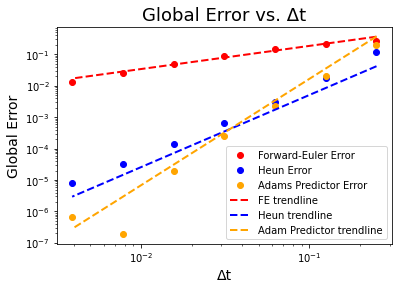

In [68]:
plt.figure(figsize=[6, 4])

plt.loglog(x,A2.T, linewidth = 0, marker= 'o', color = 'red', label="Forward-Euler Error")
plt.loglog(x,A5.T, linewidth = 0, marker= 'o', color = 'blue', label="Heun Error")
plt.loglog(x,A8.T, linewidth = 0, marker= 'o', color = 'orange', label="Adams Predictor Error")
plt.loglog(x,x**A3, color='red', linewidth = 2, label="FE trendline", linestyle ='dashed')
plt.loglog(x,x**A6, color='blue', linewidth = 2, label ="Heun trendline", linestyle ='dashed')
plt.loglog(x,40*x**A9, color='orange', linewidth = 2, label="Adam Predictor trendline", linestyle ='dashed') 
# Choose c = 40 to match the data visually 
plt.legend(loc="lower right")

plt.title('Global Error vs. Δt', fontsize=18)
plt.xlabel('Δt', fontsize=14)
plt.ylabel('Global Error', fontsize=14)
plt.show()

In [29]:
# Caption 

# Figure 1: A comparison of the errors (Forward-Euler - red, Heun - blue, Adams Predictor - yellow) 
# for the corresponding time   
# and their respective trendline on the equation: y: -3*y*np.sin(t). 

### Problem 3 - Fitzhugh (FH) model

### A14

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [31]:
tspan = [0, 100]
dt = 0.5
t = np.arange(tspan[0],tspan[1]+dt,dt)

v1 = 0.1
v2 = 0.1
w1 = 0
w2 = 0

yt0 = [v1, v2, w1, w2]

d12 = 0; d21 = 0

a1 = 0.05; a2 = 0.25; b = 0.1; c = 0.1; I = 0.1

In [32]:
def sys_rhs0(t, y, d1, d2, a1, a2, b, c, I):
    
    v1, v2, w1, w2 = y
        
    dv1dt = -v1**3+((1+a1)*v1**2)-(a1*v1)-w1+I+(d1*v2)
    dw1dt = (b*v1) - (c*w1)
    dv2dt = -v2**3+((1+a2)*v2**2)-(a2*v2)-w2+I+(d2*v1)
    dw2dt = (b*v2) - (c*w2)
    
    return [dv1dt, dv2dt, dw1dt, dw2dt]

In [33]:
sol_0 = solve_ivp(sys_rhs0, tspan, y0 = yt0, args=(d12, d21, a1, a2, b, c, I), method='BDF', t_eval = t)

In [34]:
A14 = sol_0.y.T

### A15

In [35]:
tspan = [0, 100]
dt = 0.5
t = np.arange(tspan[0],tspan[1]+dt,dt)

v1 = 0.1
v2 = 0.1
w1 = 0
w2 = 0

yt0 = [v1, v2, w1, w2]

d12_0 = 0; d21_0 = 0.2

a1 = 0.05; a2 = 0.25; b = 0.1; c = 0.1; I = 0.1

In [36]:
def sys_rhs1(t, y, d1, d2, a1, a2, b, c, I):
    
    v1, v2, w1, w2 = y
        
    dv1dt0 = -v1**3+((1+a1)*v1**2)-(a1*v1)-w1+I+(d1*v2)
    dw1dt0 = (b*v1) - (c*w1)
    dv2dt0 = -v2**3+((1+a2)*v2**2)-(a2*v2)-w2+I+(d2*v1)
    dw2dt0 = (b*v2) - (c*w2)
    
    return [dv1dt0, dv2dt0, dw1dt0, dw2dt0]

In [37]:
sol_1 = solve_ivp(sys_rhs1, tspan, y0 = yt0, args=(d12_0, d21_0, a1, a2, b, c, I), method='BDF', t_eval = t)

In [38]:
A15 = sol_1.y.T

### A16

In [39]:
tspan = [0, 100]
dt = 0.5
t = np.arange(tspan[0],tspan[1]+dt,dt)

v1 = 0.1
v2 = 0.1
w1 = 0
w2 = 0

yt0 = [v1, v2, w1, w2]

d12_1 = -0.1; d21_1 = 0.2

a1 = 0.05; a2 = 0.25; b = 0.1; c = 0.1; I = 0.1

In [40]:
def sys_rhs2(t, y, d1, d2, a1, a2, b, c, I):
    
    v1, v2, w1, w2 = y
        
    dv1dt1 = -v1**3+((1+a1)*v1**2)-(a1*v1)-w1+I+(d1*v2)
    dw1dt1 = (b*v1) - (c*w1)
    dv2dt1 = -v2**3+((1+a2)*v2**2)-(a2*v2)-w2+I+(d2*v1)
    dw2dt1 = (b*v2) - (c*w2)
    
    return [dv1dt1, dv2dt1, dw1dt1, dw2dt1]

In [41]:
sol_2 = solve_ivp(sys_rhs2, tspan, y0 = yt0, args=(d12_1, d21_1, a1, a2, b, c, I), method='BDF', t_eval = t)

In [42]:
A16 = sol_2.y.T

### A17

In [43]:
tspan = [0, 100]
dt = 0.5
t = np.arange(tspan[0],tspan[1]+dt,dt)

v1 = 0.1
v2 = 0.1
w1 = 0
w2 = 0

yt0 = [v1, v2, w1, w2]

d12_2 = -0.3; d21_2 = 0.2

a1 = 0.05; a2 = 0.25; b = 0.1; c = 0.1; I = 0.1

In [44]:
def sys_rhs3(t, y, d1, d2, a1, a2, b, c, I):
    
    v1, v2, w1, w2 = y
        
    dv1dt2 = -v1**3+((1+a1)*v1**2)-(a1*v1)-w1+I+(d1*v2)
    dw1dt2 = (b*v1) - (c*w1)
    dv2dt2 = -v2**3+((1+a2)*v2**2)-(a2*v2)-w2+I+(d2*v1)
    dw2dt2 = (b*v2) - (c*w2)
    
    return [dv1dt2, dv2dt2, dw1dt2, dw2dt2]

In [45]:
sol_3 = solve_ivp(sys_rhs3, tspan, y0 = yt0, args=(d12_2, d21_2, a1, a2, b, c, I), method='BDF', t_eval = t)

In [46]:
A17 = sol_3.y.T

### A18

In [47]:
tspan = [0, 100]
dt = 0.5
t = np.arange(tspan[0],tspan[1]+dt,dt)

v1 = 0.1
v2 = 0.1
w1 = 0
w2 = 0

yt0 = [v1, v2, w1, w2]

d12_3 = -0.5; d21_3 = 0.2

a1 = 0.05; a2 = 0.25; b = 0.1; c = 0.1; I = 0.1

In [48]:
def sys_rhs4(t, y, d1, d2, a1, a2, b, c, I):
    
    v1, v2, w1, w2 = y
        
    dv1dt3 = -v1**3+((1+a1)*v1**2)-(a1*v1)-w1+I+(d1*v2)
    dw1dt3 = (b*v1) - (c*w1)
    dv2dt3 = -v2**3+((1+a2)*v2**2)-(a2*v2)-w2+I+(d2*v1)
    dw2dt3 = (b*v2) - (c*w2)
    
    return [dv1dt3, dv2dt3, dw1dt3, dw2dt3]

In [49]:
sol_4 = solve_ivp(sys_rhs4, tspan, y0 = yt0, args=(d12_3, d21_3, a1, a2, b, c, I), method='BDF', t_eval = t)

In [50]:
A18 = sol_4.y.T

### Presentation for Problem 3

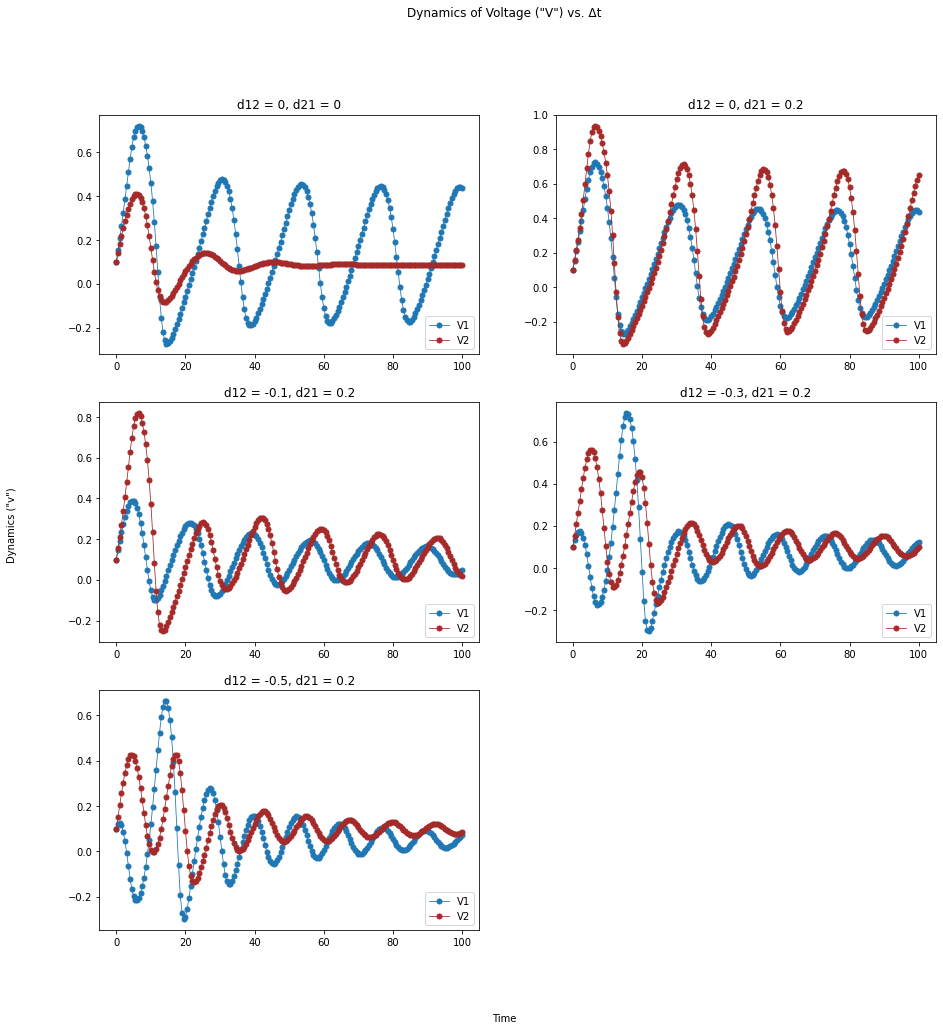

In [51]:
figure, axis = plt.subplots(3,2, figsize=(15,15))

# d12 = 0, d21 = 0
axis[0,0].plot(sol_0.t, sol_0.y[0,:], 'o-', linewidth=.8, markersize=5, label='V1') #V1
axis[0,0].plot(sol_0.t, sol_0.y[1,:], 'o-', linewidth=.8, markersize=5, label='V2', color = 'brown') #V2

axis[0,0].legend(loc="lower right")
axis[0,0].title.set_text('d12 = 0, d21 = 0')

# d12 = 0, d21 = 0.2
axis[0,1].plot(sol_1.t, sol_1.y[0,:], 'o-', linewidth=.8, markersize=5, label='V1') #V1
axis[0,1].plot(sol_1.t, sol_1.y[1,:], 'o-', linewidth=.8, markersize=5, label='V2', color = 'brown') #V2

axis[0,1].legend(loc="lower right")
axis[0,1].title.set_text('d12 = 0, d21 = 0.2')

# d12 = -0.1, d21 = 0.2
axis[1,0].plot(sol_2.t, sol_2.y[0,:], 'o-', linewidth=.8, markersize=5, label='V1') #V1
axis[1,0].plot(sol_2.t, sol_2.y[1,:], 'o-', linewidth=.8, markersize=5, label='V2', color = 'brown') #V2

axis[1,0].legend(loc="lower right")
axis[1,0].title.set_text('d12 = -0.1, d21 = 0.2')

# d12 = -0.3, d21 = 0.2
axis[1,1].plot(sol_3.t, sol_3.y[0,:], 'o-', linewidth=.8, markersize=5, label='V1') #V1
axis[1,1].plot(sol_3.t, sol_3.y[1,:], 'o-', linewidth=.8, markersize=5, label='V2', color = 'brown') #V2

axis[1,1].legend(loc="lower right")
axis[1,1].title.set_text('d12 = -0.3, d21 = 0.2')

# d12 = -0.5, d21 = 0.2
axis[2,0].plot(sol_4.t, sol_4.y[0,:], 'o-', linewidth=.8, markersize=5, label='V1') #V1
axis[2,0].plot(sol_4.t, sol_4.y[1,:], 'o-', linewidth=.8, markersize=5, label='V2', color = 'brown') #V2

axis[2,0].legend(loc="lower right")
axis[2,0].title.set_text('d12 = -0.5, d21 = 0.2')

# Set common labels
figure.suptitle('Dynamics of Voltage ("V") vs. Δt')
figure.text(0.5, 0.04, 'Time', ha='center')
figure.text(0.04, 0.5, 'Dynamics ("v")', va='center', rotation='vertical')

# Remove extra box
figure.delaxes(axis[2,1])

plt.show()

figure.savefig("problem3.pdf")

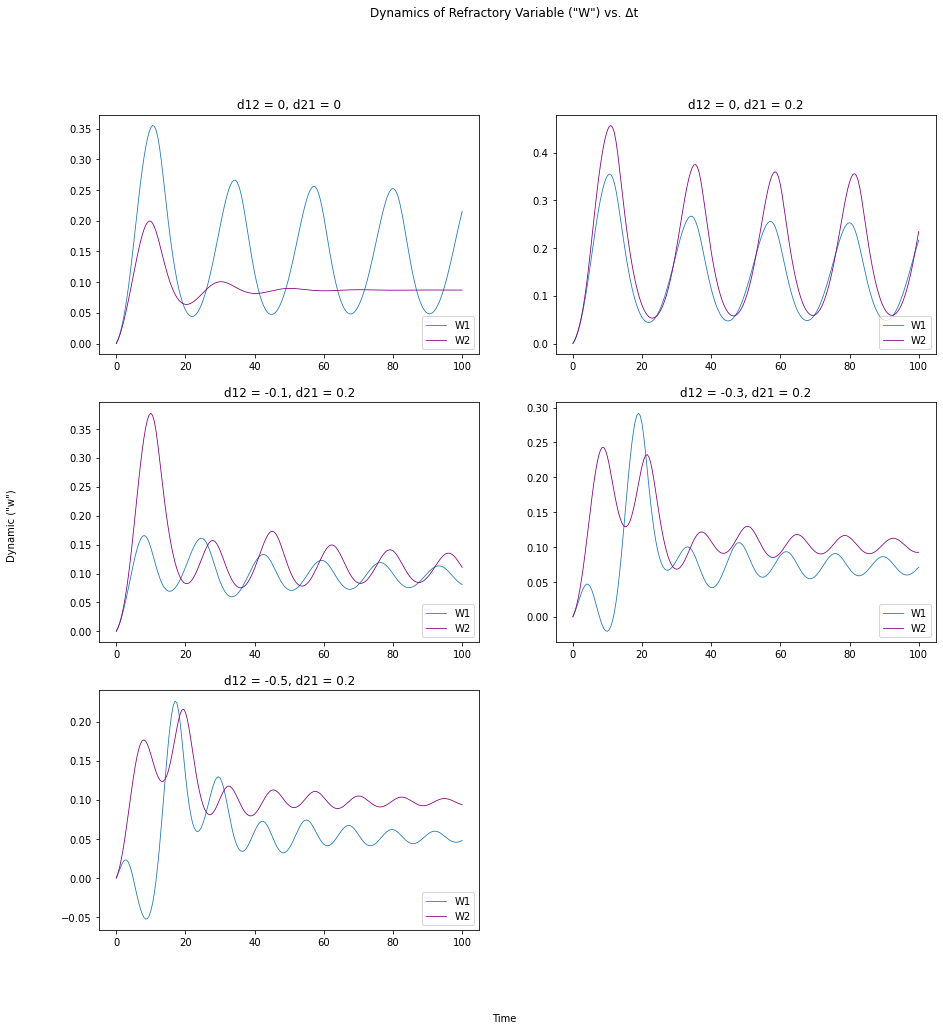

In [52]:
figure, axis = plt.subplots(3,2, figsize=(15,15))

# d12 = 0, d21 = 0
axis[0,0].plot(sol_0.t, sol_0.y[2,:], linewidth=.8, markersize=5, label='W1') #W1
axis[0,0].plot(sol_0.t, sol_0.y[3,:], linewidth=.8, markersize=5, label='W2', color = 'purple') #W2

axis[0,0].legend(loc="lower right")
axis[0,0].title.set_text('d12 = 0, d21 = 0')

# d12 = 0, d21 = 0.2
axis[0,1].plot(sol_1.t, sol_1.y[2,:], linewidth=.8, markersize=5, label='W1') #W1
axis[0,1].plot(sol_1.t, sol_1.y[3,:], linewidth=.8, markersize=5, label='W2', color = 'purple') #W2

axis[0,1].legend(loc="lower right")
axis[0,1].title.set_text('d12 = 0, d21 = 0.2')

# d12 = -0.1, d21 = 0.2
axis[1,0].plot(sol_2.t, sol_2.y[2,:], linewidth=.8, markersize=5, label='W1') #W1
axis[1,0].plot(sol_2.t, sol_2.y[3,:], linewidth=.8, markersize=5, label='W2', color = 'purple') #W2

axis[1,0].legend(loc="lower right")
axis[1,0].title.set_text('d12 = -0.1, d21 = 0.2')

# d12 = -0.3, d21 = 0.2
axis[1,1].plot(sol_3.t, sol_3.y[2,:], linewidth=.8, markersize=5, label='W1') #W1
axis[1,1].plot(sol_3.t, sol_3.y[3,:], linewidth=.8, markersize=5, label='W2', color = 'purple') #W2

axis[1,1].legend(loc="lower right")
axis[1,1].title.set_text('d12 = -0.3, d21 = 0.2')

# d12 = -0.5, d21 = 0.2
axis[2,0].plot(sol_4.t, sol_4.y[2,:], linewidth=.8, markersize=5, label='W1') #W1
axis[2,0].plot(sol_4.t, sol_4.y[3,:], linewidth=.8, markersize=5, label='W2', color = 'purple') #W2

axis[2,0].legend(loc="lower right")
axis[2,0].title.set_text('d12 = -0.5, d21 = 0.2')

# Set common labels
figure.suptitle('Dynamics of Refractory Variable ("W") vs. Δt')
figure.text(0.5, 0.04, 'Time', ha='center')
figure.text(0.04, 0.5, 'Dynamic ("w")', va='center', rotation='vertical')

# Remove extra box
figure.delaxes(axis[2,1])

plt.show()

figure.savefig("problem3_2.pdf")

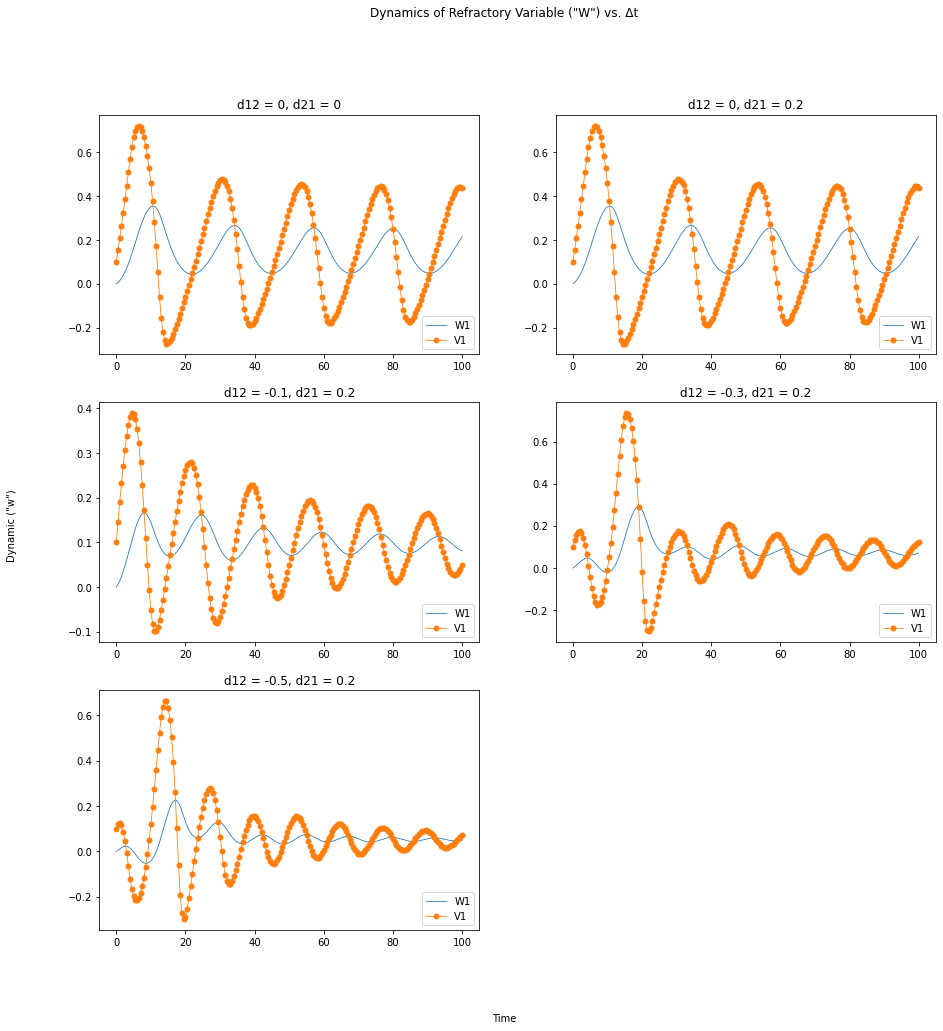

In [53]:
figure, axis = plt.subplots(3,2, figsize=(15,15))

# d12 = 0, d21 = 0
axis[0,0].plot(sol_0.t, sol_0.y[2,:], linewidth=.8, markersize=5, label='W1') #W1
# axis[0,0].plot(sol_0.t, sol_0.y[3,:], linewidth=.8, markersize=5, label='W2', color = 'purple') #W2
axis[0,0].plot(sol_0.t, sol_0.y[0,:], 'o-', linewidth=.8, markersize=5, label='V1') #V1
# axis[0,0].plot(sol_0.t, sol_0.y[1,:], 'o-', linewidth=.8, markersize=5, label='V2', color = 'brown') #V2

axis[0,0].legend(loc="lower right")
axis[0,0].title.set_text('d12 = 0, d21 = 0')

# d12 = 0, d21 = 0.2
axis[0,1].plot(sol_1.t, sol_1.y[2,:], linewidth=.8, markersize=5, label='W1') #W1
# axis[0,1].plot(sol_1.t, sol_1.y[3,:], linewidth=.8, markersize=5, label='W2', color = 'purple') #W2
axis[0,1].plot(sol_1.t, sol_1.y[0,:], 'o-', linewidth=.8, markersize=5, label='V1') #V1
# axis[0,1].plot(sol_1.t, sol_1.y[1,:], 'o-', linewidth=.8, markersize=5, label='V2', color = 'brown') #V2

axis[0,1].legend(loc="lower right")
axis[0,1].title.set_text('d12 = 0, d21 = 0.2')

# d12 = -0.1, d21 = 0.2
axis[1,0].plot(sol_2.t, sol_2.y[2,:], linewidth=.8, markersize=5, label='W1') #W1
# axis[1,0].plot(sol_2.t, sol_2.y[3,:], linewidth=.8, markersize=5, label='W2', color = 'purple') #W2
axis[1,0].plot(sol_2.t, sol_2.y[0,:], 'o-', linewidth=.8, markersize=5, label='V1') #V1
# axis[1,0].plot(sol_2.t, sol_2.y[1,:], 'o-', linewidth=.8, markersize=5, label='V2', color = 'brown') #V2

axis[1,0].legend(loc="lower right")
axis[1,0].title.set_text('d12 = -0.1, d21 = 0.2')

# d12 = -0.3, d21 = 0.2
axis[1,1].plot(sol_3.t, sol_3.y[2,:], linewidth=.8, markersize=5, label='W1') #W1
# axis[1,1].plot(sol_3.t, sol_3.y[3,:], linewidth=.8, markersize=5, label='W2', color = 'purple') #W2
axis[1,1].plot(sol_3.t, sol_3.y[0,:], 'o-', linewidth=.8, markersize=5, label='V1') #V1
# axis[1,1].plot(sol_3.t, sol_3.y[1,:], 'o-', linewidth=.8, markersize=5, label='V2', color = 'brown') #V2

axis[1,1].legend(loc="lower right")
axis[1,1].title.set_text('d12 = -0.3, d21 = 0.2')

# d12 = -0.5, d21 = 0.2
axis[2,0].plot(sol_4.t, sol_4.y[2,:], linewidth=.8, markersize=5, label='W1') #W1
# axis[2,0].plot(sol_4.t, sol_4.y[3,:], linewidth=.8, markersize=5, label='W2', color = 'purple') #W2
axis[2,0].plot(sol_4.t, sol_4.y[0,:], 'o-', linewidth=.8, markersize=5, label='V1') #V1
# axis[2,0].plot(sol_4.t, sol_4.y[1,:], 'o-', linewidth=.8, markersize=5, label='V2', color = 'brown') #V2

axis[2,0].legend(loc="lower right")
axis[2,0].title.set_text('d12 = -0.5, d21 = 0.2')

# Set common labels
figure.suptitle('Dynamics of Refractory Variable ("W") vs. Δt')
figure.text(0.5, 0.04, 'Time', ha='center')
figure.text(0.04, 0.5, 'Dynamic ("w")', va='center', rotation='vertical')

# Remove extra box
figure.delaxes(axis[2,1])

plt.show()

# figure.savefig("problem3_2.pdf")

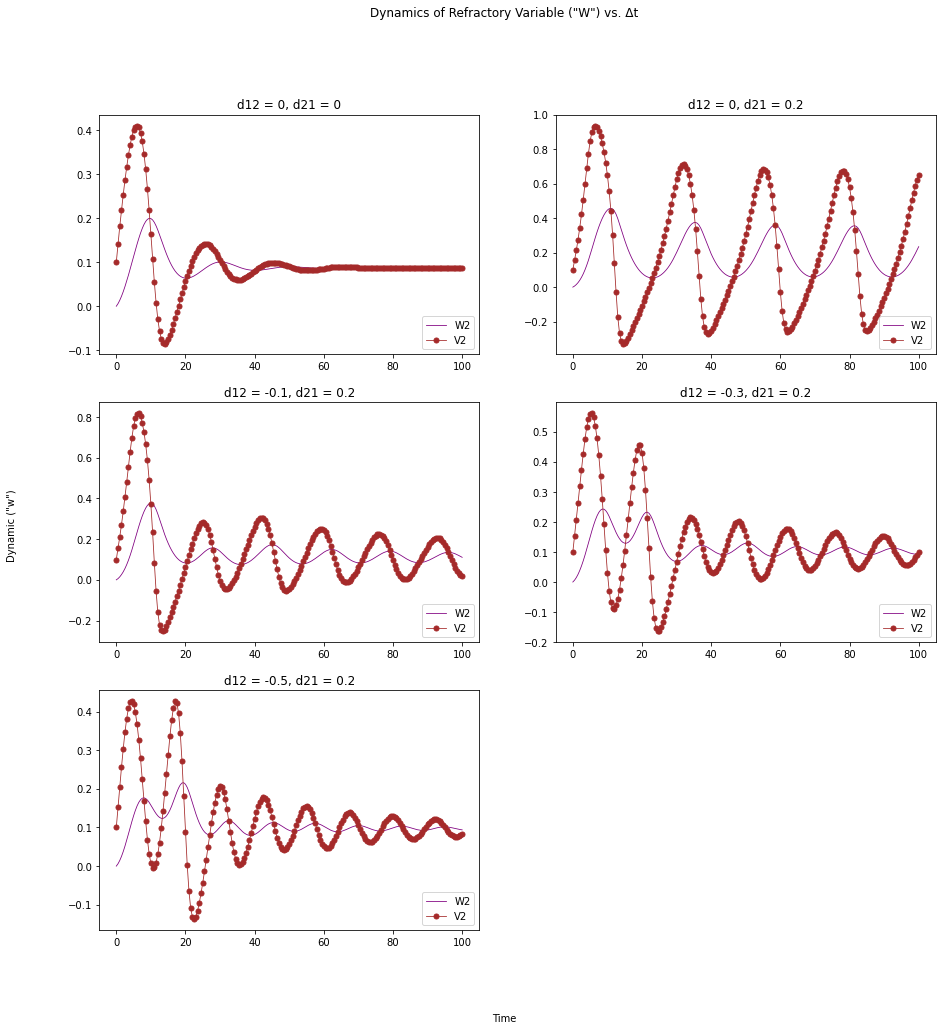

In [54]:
figure, axis = plt.subplots(3,2, figsize=(15,15))

# d12 = 0, d21 = 0
# axis[0,0].plot(sol_0.t, sol_0.y[2,:], linewidth=.8, markersize=5, label='W1') #W1
axis[0,0].plot(sol_0.t, sol_0.y[3,:], linewidth=.8, markersize=5, label='W2', color = 'purple') #W2
# axis[0,0].plot(sol_0.t, sol_0.y[0,:], 'o-', linewidth=.8, markersize=5, label='V1') #V1
axis[0,0].plot(sol_0.t, sol_0.y[1,:], 'o-', linewidth=.8, markersize=5, label='V2', color = 'brown') #V2

axis[0,0].legend(loc="lower right")
axis[0,0].title.set_text('d12 = 0, d21 = 0')

# d12 = 0, d21 = 0.2
# axis[0,1].plot(sol_1.t, sol_1.y[2,:], linewidth=.8, markersize=5, label='W1') #W1
axis[0,1].plot(sol_1.t, sol_1.y[3,:], linewidth=.8, markersize=5, label='W2', color = 'purple') #W2
# axis[0,1].plot(sol_1.t, sol_1.y[0,:], 'o-', linewidth=.8, markersize=5, label='V1') #V1
axis[0,1].plot(sol_1.t, sol_1.y[1,:], 'o-', linewidth=.8, markersize=5, label='V2', color = 'brown') #V2

axis[0,1].legend(loc="lower right")
axis[0,1].title.set_text('d12 = 0, d21 = 0.2')

# d12 = -0.1, d21 = 0.2
# axis[1,0].plot(sol_2.t, sol_2.y[2,:], linewidth=.8, markersize=5, label='W1') #W1
axis[1,0].plot(sol_2.t, sol_2.y[3,:], linewidth=.8, markersize=5, label='W2', color = 'purple') #W2
# axis[1,0].plot(sol_2.t, sol_2.y[0,:], 'o-', linewidth=.8, markersize=5, label='V1') #V1
axis[1,0].plot(sol_2.t, sol_2.y[1,:], 'o-', linewidth=.8, markersize=5, label='V2', color = 'brown') #V2

axis[1,0].legend(loc="lower right")
axis[1,0].title.set_text('d12 = -0.1, d21 = 0.2')

# d12 = -0.3, d21 = 0.2
# axis[1,1].plot(sol_3.t, sol_3.y[2,:], linewidth=.8, markersize=5, label='W1') #W1
axis[1,1].plot(sol_3.t, sol_3.y[3,:], linewidth=.8, markersize=5, label='W2', color = 'purple') #W2
# axis[1,1].plot(sol_3.t, sol_3.y[0,:], 'o-', linewidth=.8, markersize=5, label='V1') #V1
axis[1,1].plot(sol_3.t, sol_3.y[1,:], 'o-', linewidth=.8, markersize=5, label='V2', color = 'brown') #V2

axis[1,1].legend(loc="lower right")
axis[1,1].title.set_text('d12 = -0.3, d21 = 0.2')

# d12 = -0.5, d21 = 0.2
# axis[2,0].plot(sol_4.t, sol_4.y[2,:], linewidth=.8, markersize=5, label='W1') #W1
axis[2,0].plot(sol_4.t, sol_4.y[3,:], linewidth=.8, markersize=5, label='W2', color = 'purple') #W2
# axis[2,0].plot(sol_4.t, sol_4.y[0,:], 'o-', linewidth=.8, markersize=5, label='V1') #V1
axis[2,0].plot(sol_4.t, sol_4.y[1,:], 'o-', linewidth=.8, markersize=5, label='V2', color = 'brown') #V2

axis[2,0].legend(loc="lower right")
axis[2,0].title.set_text('d12 = -0.5, d21 = 0.2')

# Set common labels
figure.suptitle('Dynamics of Refractory Variable ("W") vs. Δt')
figure.text(0.5, 0.04, 'Time', ha='center')
figure.text(0.04, 0.5, 'Dynamic ("w")', va='center', rotation='vertical')

# Remove extra box
figure.delaxes(axis[2,1])

plt.show()

# figure.savefig("problem3_2.pdf")

### Extra Plots

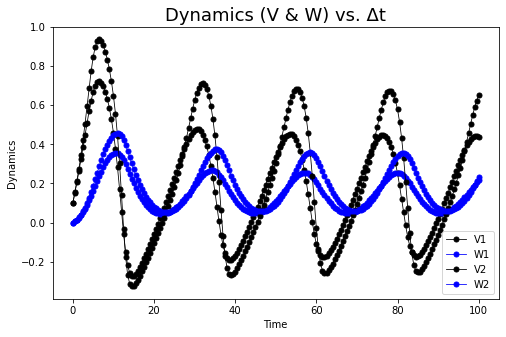

In [55]:
# d12 = 0, d21 = 0.2

plt.figure(figsize=[8, 5])

plt.plot(sol_1.t, sol_1.y[0,:], 'ko-', linewidth=.8, markersize=5, label='V1') #V1
plt.plot(sol_1.t, sol_1.y[2,:], 'bo-', linewidth=.8, markersize=5, label='W1') #W1
plt.plot(sol_1.t, sol_1.y[1,:], 'ko-', linewidth=.8, markersize=5, label='V2') #V2
plt.plot(sol_1.t, sol_1.y[3,:], 'bo-', linewidth=.8, markersize=5, label='W2') #W2

plt.legend(loc="lower right")
plt.ylabel('Dynamics'); plt.xlabel('Time')
plt.title('Dynamics (V & W) vs. Δt', fontsize=18)

plt.show()

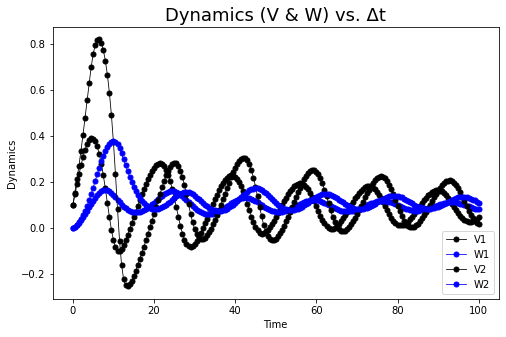

In [56]:
# d12 = -0.1, d21 = 0.2

plt.figure(figsize=[8, 5])

plt.plot(sol_2.t, sol_2.y[0,:], 'ko-', linewidth=.8, markersize=5, label='V1') #V1
plt.plot(sol_2.t, sol_2.y[2,:], 'bo-', linewidth=.8, markersize=5, label='W1') #W1
plt.plot(sol_2.t, sol_2.y[1,:], 'ko-', linewidth=.8, markersize=5, label='V2') #V2
plt.plot(sol_2.t, sol_2.y[3,:], 'bo-', linewidth=.8, markersize=5, label='W2') #W2

plt.legend(loc="lower right")
plt.ylabel('Dynamics'); plt.xlabel('Time')
plt.title('Dynamics (V & W) vs. Δt', fontsize=18)

plt.show()

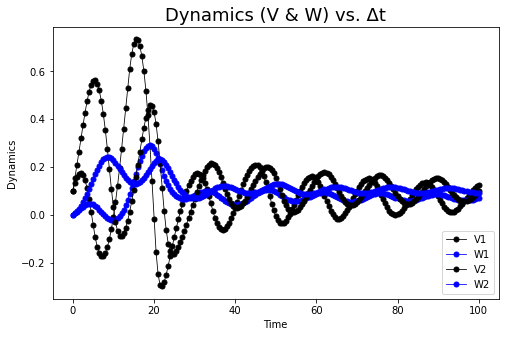

In [57]:
# d12 = -0.3, d21 = 0.2

plt.figure(figsize=[8, 5])

plt.plot(sol_3.t, sol_3.y[0,:], 'ko-', linewidth=.8, markersize=5, label='V1') #V1
plt.plot(sol_3.t, sol_3.y[2,:], 'bo-', linewidth=.8, markersize=5, label='W1') #W1
plt.plot(sol_3.t, sol_3.y[1,:], 'ko-', linewidth=.8, markersize=5, label='V2') #V2
plt.plot(sol_3.t, sol_3.y[3,:], 'bo-', linewidth=.8, markersize=5, label='W2') #W2

plt.legend(loc="lower right")
plt.ylabel('Dynamics'); plt.xlabel('Time')
plt.title('Dynamics (V & W) vs. Δt', fontsize=18)

plt.show()

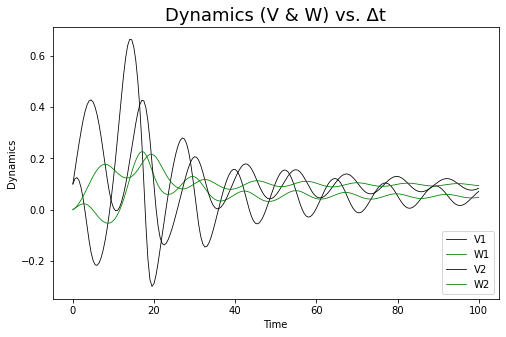

In [58]:
# d12 = -0.5, d21 = 0.2

plt.figure(figsize=[8, 5])

plt.plot(sol_4.t, sol_4.y[0,:], 'k-', linewidth=.8, markersize=5, label='V1') #V1
plt.plot(sol_4.t, sol_4.y[2,:], 'g-', linewidth=.8, markersize=5, label='W1') #W1
plt.plot(sol_4.t, sol_4.y[1,:], 'k-', linewidth=.8, markersize=5, label='V2') #V2
plt.plot(sol_4.t, sol_4.y[3,:], 'g-', linewidth=.8, markersize=5, label='W2') #W2

plt.legend(loc="lower right")
plt.ylabel('Dynamics'); plt.xlabel('Time')
plt.title('Dynamics (V & W) vs. Δt', fontsize=18)

plt.show()

### Other plotting codes

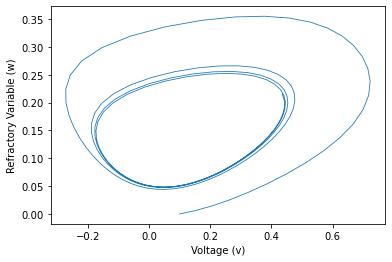

In [59]:
plt.plot(sol_0.y[0,:], sol_0.y[2,:], linewidth=.8)
plt.ylabel('Refractory Variable (w)'); plt.xlabel('Voltage (v)')
plt.show()

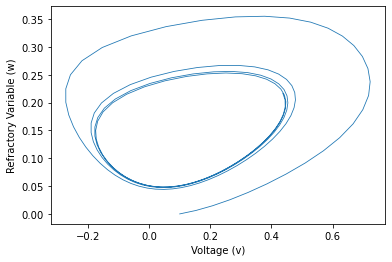

In [60]:
plt.plot(sol_1.y[0,:], sol_1.y[2,:], linewidth=.8)
plt.ylabel('Refractory Variable (w)'); plt.xlabel('Voltage (v)')
plt.show()

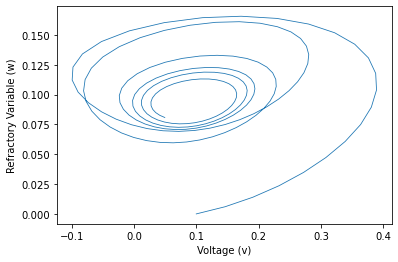

In [61]:
plt.plot(sol_2.y[0,:], sol_2.y[2,:], linewidth=.8)
plt.ylabel('Refractory Variable (w)'); plt.xlabel('Voltage (v)')
plt.show()

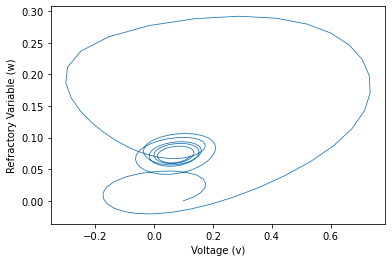

In [62]:
plt.plot(sol_3.y[0,:], sol_3.y[2,:], linewidth=.8)
plt.ylabel('Refractory Variable (w)'); plt.xlabel('Voltage (v)')
plt.show()

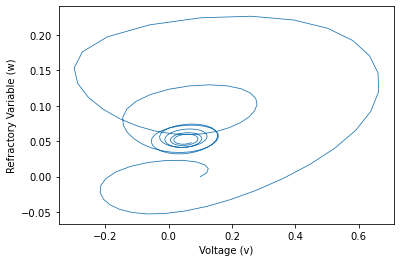

In [63]:
plt.plot(sol_4.y[0,:], sol_4.y[2,:], linewidth=.8)
plt.ylabel('Refractory Variable (w)'); plt.xlabel('Voltage (v)')
plt.show()

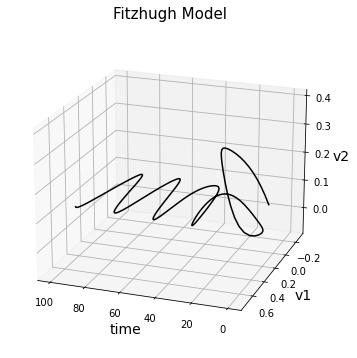

In [64]:
fig = plt.figure(figsize=(7.5,6))
ax = plt.axes(projection='3d')
ax.plot3D(sol_0.t, sol_0.y[0,:], sol_0.y[1,:], 'k-')
ax.view_init(20, 110)
ax.set_xlabel('time', fontsize=14)
ax.set_ylabel('v1', fontsize=14)
ax.set_zlabel('v2', fontsize=14)
plt.title('Fitzhugh Model', fontsize=15)
plt.show()